# DAILY FOOD AND NUTRITION

Muh Amri Sidiq

## Introduction

Proper nutrition plays a vital role in maintaining a healthy lifestyle. Tracking daily food intake and optimizing calorie consumption are essential to achieving fitness and health goals. In this project, I utilize machine learning techniques to predict calorie intake based on various food attributes.

To achieve accurate predictions, I implement the XGBoost algorithm combined with GridSearch for hyperparameter tuning. This approach enhances model performance by systematically selecting the best parameters, ensuring precise calorie predictions

## Install Library

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

## Load Data

In [4]:
df_food = pd.read_csv("daily_food_nutrition_dataset.csv")

check preview data

In [5]:
df_food.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


check missing values

In [6]:
print(df_food.isnull().sum())

Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64


no have missing values, and check duplicated data

In [7]:
print(df_food.duplicated().sum())

0


Use `describe()` to show summary statistic

In [8]:
df_food.describe()

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


Range data is variable, next check type and structure data

In [9]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


we have 10000 row and 14 column, with explain this bellow

 - `Date`: The date on which the food was consumed (YYYY-MM-DD).
 - `User_ID`: A unique identifier for each individual in the dataset.
 - `Food_Item`: Name of the consumed food (e.g., Apple, Rice, Chicken Breast).
 - `Category`: Type of food (e.g., Fruits, Vegetables, Dairy, Meat, Grains, Beverages, Snacks).
 - `Calories (kcal)`: Energy content of the food item, measured in kilocalories.
 - `Protein (g)`: Protein content in grams.
 - `Carbohydrates (g)`: Total carbohydrates in grams.
 - `Fat (g)`: Total fat content in grams.
 - `Fiber (g)`: Dietary fiber in grams.
 - `Sugars (g)`: Total sugar content in grams.
 - `Sodium (mg)`: Sodium content in milligrams.
 - `Cholesterol (mg)`: Cholesterol level in milligrams.
 - `Meal_Type`: The type of meal (e.g., Breakfast, Lunch, Dinner, Snack).
 - `Water_Intake (ml)`: Amount of water consumed during the meal, measured in milliliters.

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data science workflow that involves analyzing and summarizing datasets to uncover patterns, relationships, and anomalies before building models. It helps data scientists and analysts understand the structure and characteristics of the data, identify missing values, detect outliers, and determine the most relevant features for modeling

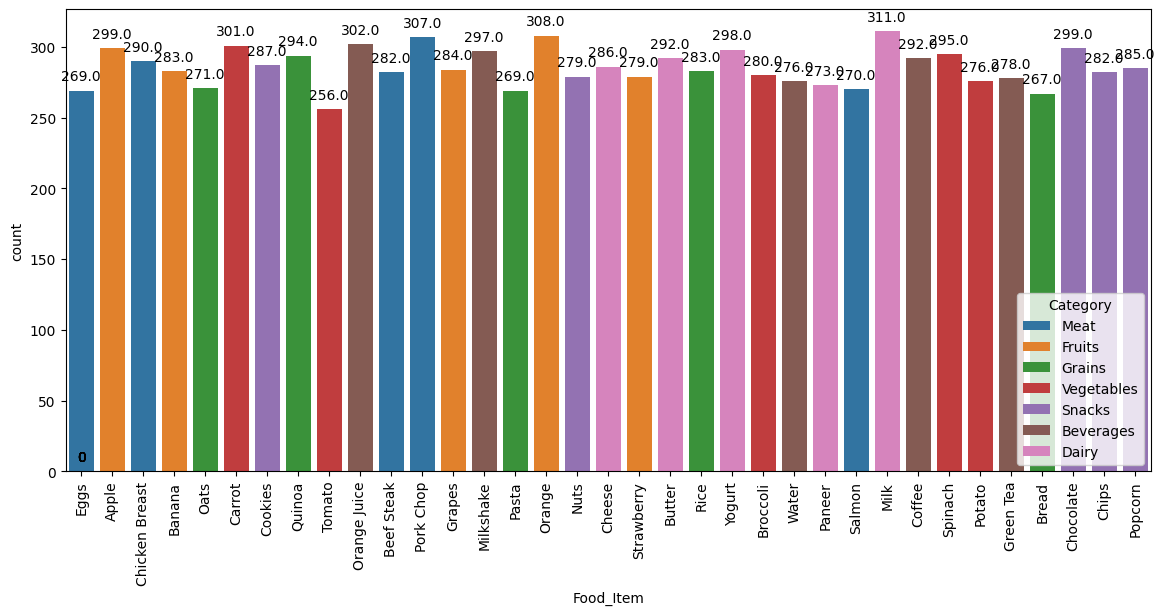

In [11]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Food_Item', hue='Category', data=df_food)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=90)
plt.show()

Insight: `Food_Item` Milk with `Category` dairy have count highest, and lowest `Food_Item` is tomato with `Category` Vegetables

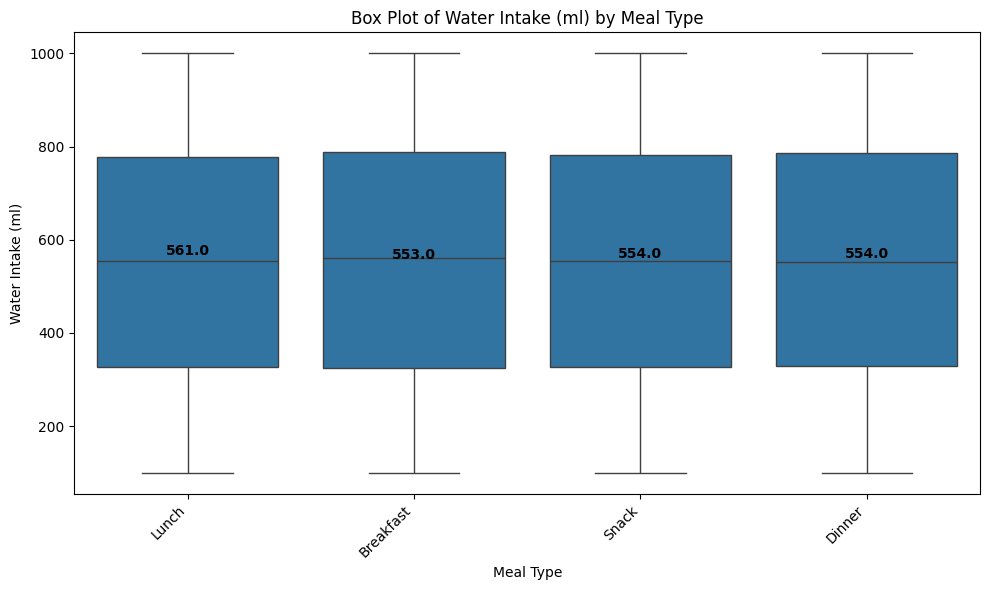

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Meal_Type', y='Water_Intake (ml)', data=df_food)

grouped = df_food.groupby('Meal_Type')['Water_Intake (ml)']

for i, meal_type in enumerate(grouped.groups.keys()):
    values = grouped.get_group(meal_type)
    
    median = np.median(values)  # Median
    
    ax.text(i, median, f'{median:.1f}', ha='center', va='bottom', 
            fontsize=10, color='black', fontweight='bold')

plt.title('Box Plot of Water Intake (ml) by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Water Intake (ml)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Insight: `Meal_type` with type Lunch have `Water_Intake (ml)` median highest

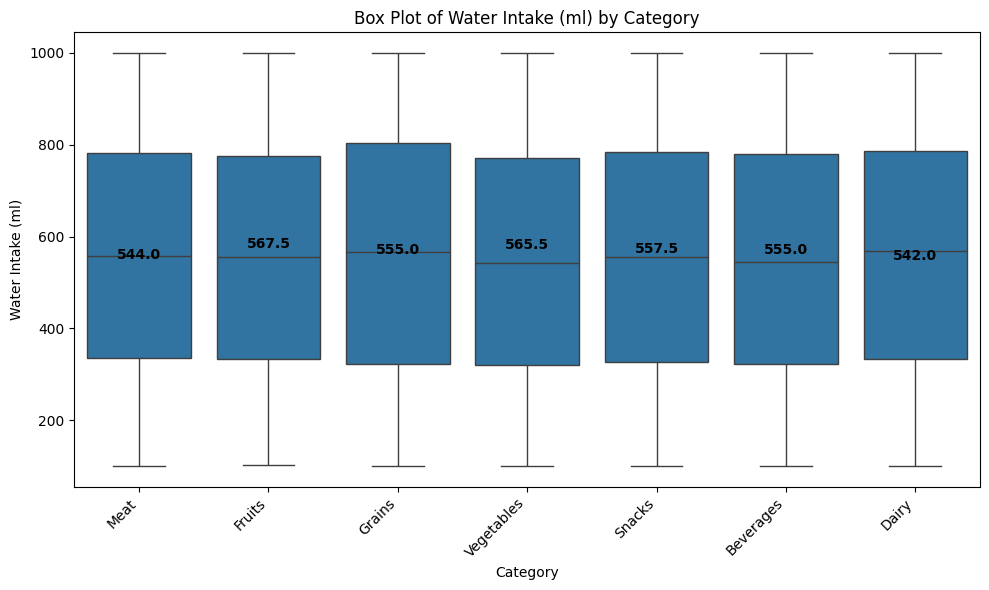

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Category', y='Water_Intake (ml)', data=df_food)

grouped = df_food.groupby('Category')['Water_Intake (ml)']

for i, category in enumerate(grouped.groups.keys()):
    median = np.median(grouped.get_group(category)) 
    
    ax.text(i, median, f'{median:.1f}', ha='center', va='bottom', 
            fontsize=10, color='black', fontweight='bold')

plt.title('Box Plot of Water Intake (ml) by Category')
plt.xlabel('Category')
plt.ylabel('Water Intake (ml)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Insight: `Category` with type Snacks have median `Water_Intake` highest

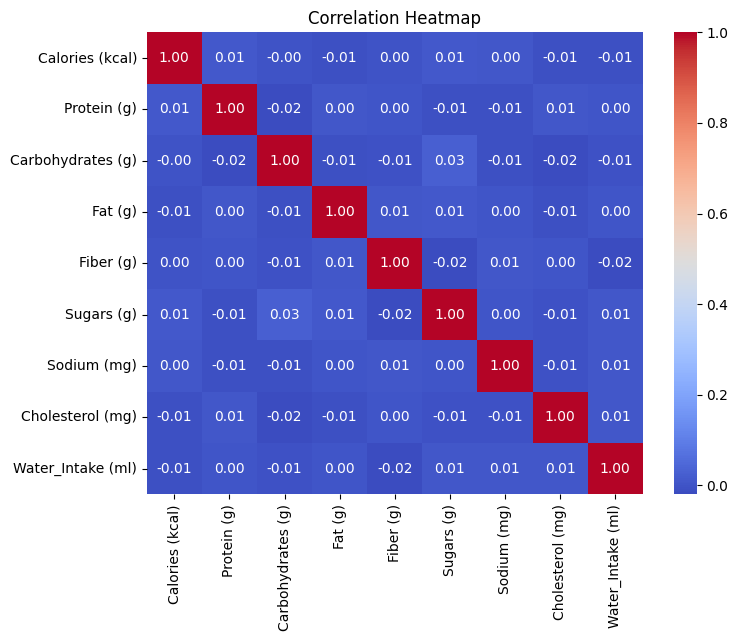

In [17]:
correlation_matrix = df_food[['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Water_Intake (ml)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Insight: almost feature have weak correlation with target `Calories (kcal)`

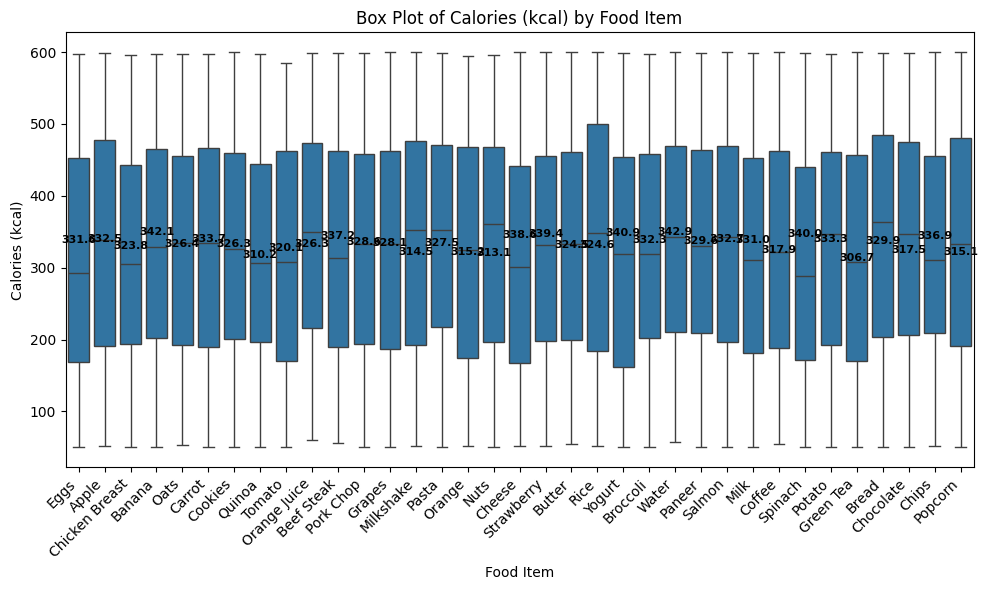

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Food_Item', y='Calories (kcal)', data=df_food)

grouped = df_food.groupby('Food_Item')['Calories (kcal)']

for i, food_item in enumerate(grouped.groups.keys()):
    mean = np.mean(grouped.get_group(food_item)) 
    
    ax.text(i, mean, f'{mean:.1f}', ha='center', va='bottom', 
            fontsize=8, color='black', fontweight='bold')

plt.title('Box Plot of Calories (kcal) by Food Item')
plt.xlabel('Food Item')
plt.ylabel('Calories (kcal)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Insight: `Food_Item` type Rice have mean `Calories (Kcal)` highest

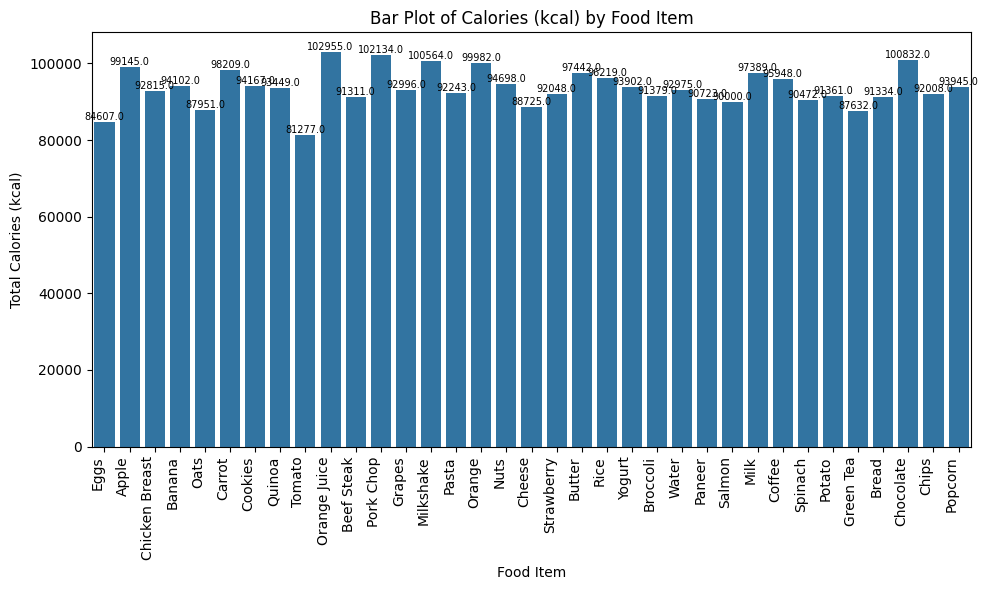

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Food_Item', y='Calories (kcal)', data=df_food, estimator=sum, errorbar=None)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(),  
            f'{p.get_height():.1f}', 
            ha='center', va='bottom', fontsize=7, color='black', fontweight='normal')

plt.title('Bar Plot of Calories (kcal) by Food Item')
plt.xlabel('Food Item')
plt.ylabel('Total Calories (kcal)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Insight: `Food_Item` type Orange Juice have highest `Total Calories (kcal)`, and tomato have `Total Caloreis (kcal)` lowest

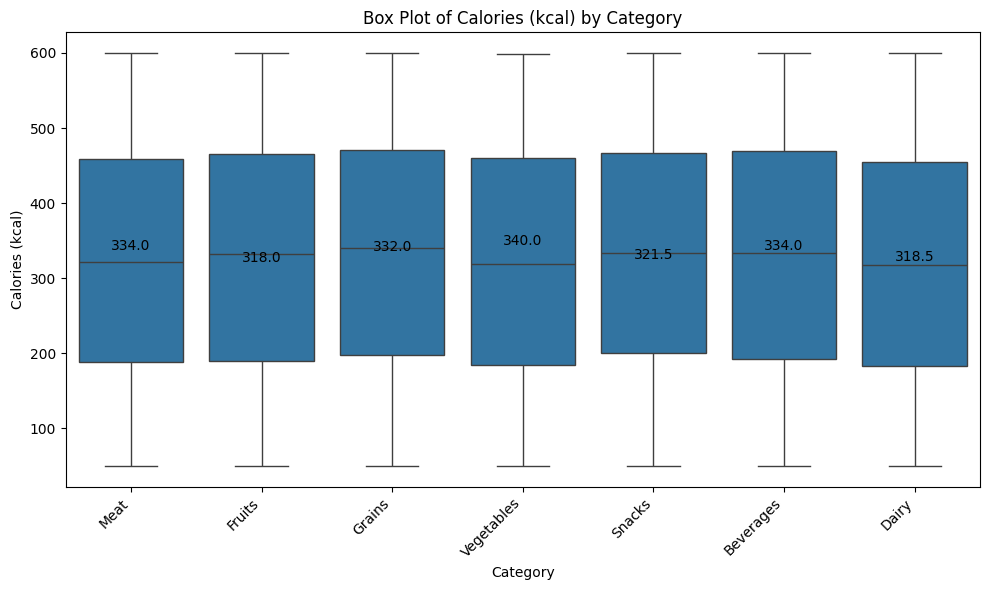

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Category', y='Calories (kcal)', data=df_food)

grouped = df_food.groupby('Category')['Calories (kcal)']

for i, category in enumerate(grouped.groups.keys()):
    median = np.median(grouped.get_group(category)) 
    
    ax.text(i, median, f'{median:.1f}', ha='center', va='bottom', 
            fontsize=10, color='black', fontweight='medium')

plt.title('Box Plot of Calories (kcal) by Category')
plt.xlabel('Category')
plt.ylabel('Calories (kcal)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels untuk tampilan lebih baik
plt.tight_layout()
plt.show()

Insight: `Category` type vegetables have median highest `Calories (kcal)`

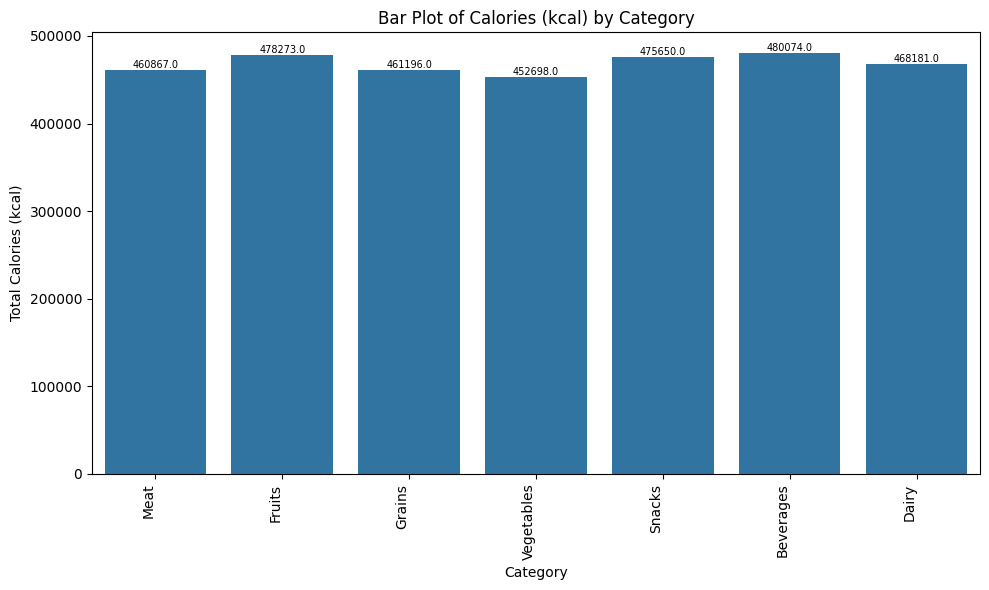

In [36]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Calories (kcal)', data=df_food, estimator=sum, errorbar=None)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(),  
            f'{p.get_height():.1f}', 
            ha='center', va='bottom', fontsize=7, color='black', fontweight='normal')

plt.title('Bar Plot of Calories (kcal) by Category')
plt.xlabel('Category')
plt.ylabel('Total Calories (kcal)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Insihgt: `Category` type Beverages have highest Total `Calories (kcal)`

## Feature Engineering

Feature Engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. It involves creating, selecting, and modifying features to improve predictive accuracy and make the data more suitable for analysis.

timing and consumption patterns

In [32]:
df_food['Date'] = pd.to_datetime(df_food['Date'])

df_food['Day_of_Week'] = df_food['Date'].dt.day_name()
df_food['Weekend'] = df_food['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)
df_food['Month'] = df_food['Date'].dt.month

meal_counts = df_food.groupby('User_ID')['Meal_Type'].count().reset_index()
meal_counts.rename(columns={'Meal_Type': 'Total_Meals'}, inplace=True)
df_food = df_food.merge(meal_counts, on='User_ID', how='left')

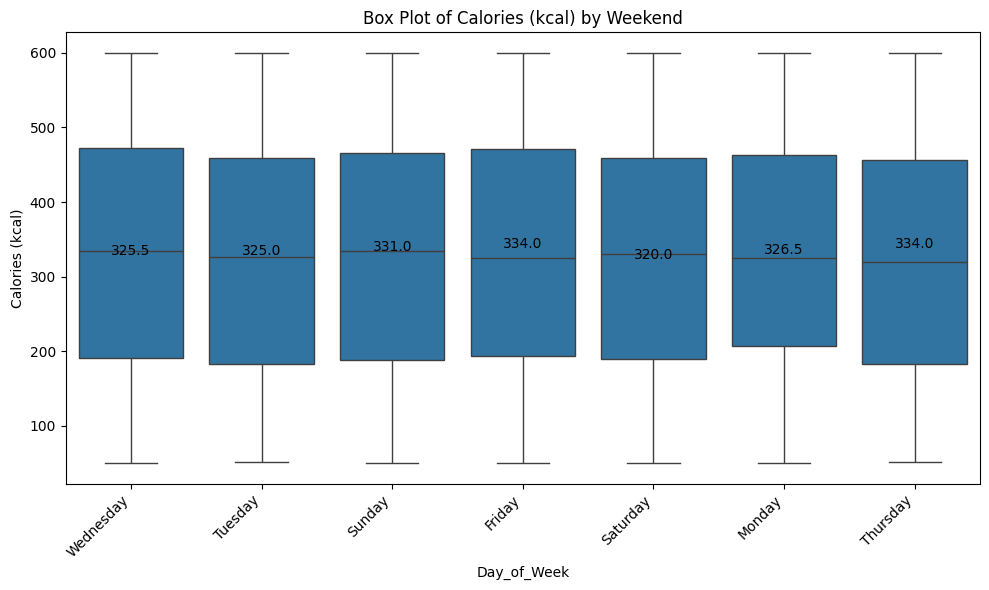

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Day_of_Week', y='Calories (kcal)', data=df_food)

grouped = df_food.groupby('Day_of_Week')['Calories (kcal)']

for i, day in enumerate(grouped.groups.keys()):
    median = np.median(grouped.get_group(day))
    
    ax.text(i, median, f'{median:.1f}', ha='center', va='bottom', 
            fontsize=10, color='black', fontweight='medium')

plt.title('Box Plot of Calories (kcal) by Weekend')
plt.xlabel('Day_of_Week')
plt.ylabel('Calories (kcal)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight: `Day_of_Week` type Friday and Thursday have median highest `Calories (kcal)`

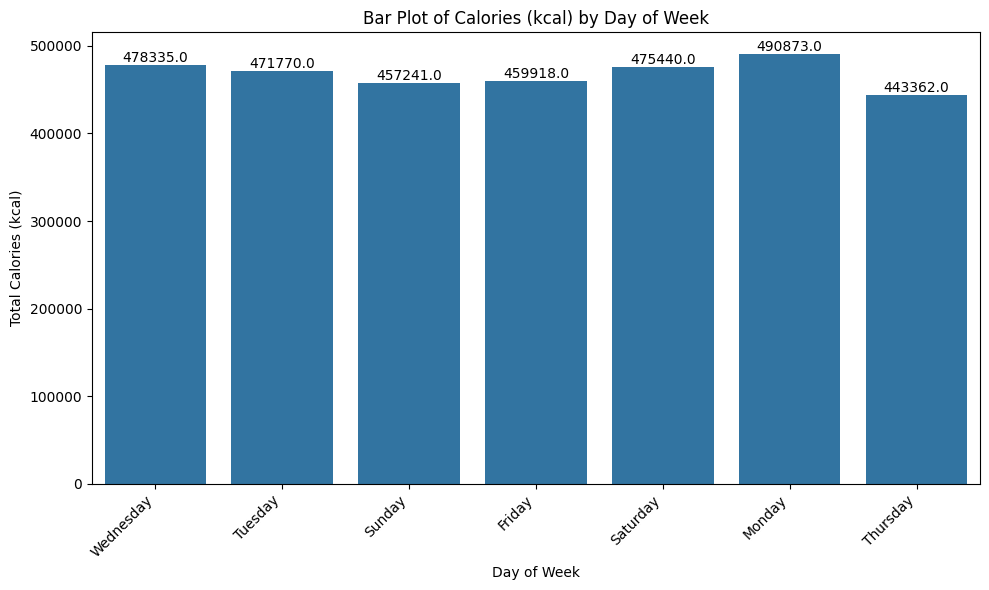

In [35]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day_of_Week', y='Calories (kcal)', data=df_food, estimator=sum, errorbar=None)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(),  
            f'{p.get_height():.1f}', 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='medium')

plt.title('Bar Plot of Calories (kcal) by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Calories (kcal)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Insight: `Day_of_Week` monday have Total `Calories (kcal)` highest

Nutrient Aggregation per User

In [38]:
daily_nutrition = df_food.groupby(['User_ID', 'Date']).agg({
    'Calories (kcal)': 'sum',
    'Protein (g)': 'sum',
    'Carbohydrates (g)': 'sum',
    'Fat (g)': 'sum',
    'Fiber (g)': 'sum',
    'Sugars (g)': 'sum',
    'Sodium (mg)': 'sum',
    'Cholesterol (mg)': 'sum',
    'Water_Intake (ml)': 'sum'
}).reset_index()
daily_nutrition.head()


,User_ID,Date,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
0,1,2024-09-17,364,31.4,95.1,14.4,0.4,23.5,913,204,825
1,1,2024-11-04,180,17.6,38.6,12.9,1.2,6.5,998,294,995
2,1,2024-11-19,231,21.7,16.1,30.2,7.0,13.1,865,292,668
3,2,2024-04-10,142,2.5,64.6,9.0,2.0,24.2,785,220,374
4,2,2024-05-08,575,32.7,79.7,8.4,6.8,23.3,414,74,291


In [39]:
df_food['Protein_Percentage'] = df_food['Protein (g)'] * 4 / df_food['Calories (kcal)']
df_food['Carb_Percentage'] = df_food['Carbohydrates (g)'] * 4 / df_food['Calories (kcal)']
df_food['Fat_Percentage'] = df_food['Fat (g)'] * 9 / df_food['Calories (kcal)']

Food Category & Item Features

In [40]:
food_counts = df_food.groupby(['User_ID', 'Food_Item']).size().reset_index(name='Food_Frequency')
df_food = df_food.merge(food_counts, on=['User_ID', 'Food_Item'], how='left')

In [41]:
top_category = df_food.groupby(['User_ID', 'Category']).size().reset_index(name='Category_Count')
df_food = df_food.merge(top_category, on=['User_ID', 'Category'], how='left')

Pattern Hidration

In [42]:
df_food['Water_per_Calorie'] = df_food['Water_Intake (ml)'] / df_food['Calories (kcal)']

In [43]:
daily_water = df_food.groupby(['User_ID', 'Date'])['Water_Intake (ml)'].sum().reset_index()
df_food = df_food.merge(daily_water, on=['User_ID', 'Date'], how='left', suffixes=('', '_Daily'))

## Label Encoder

Label Encoding is a technique used to convert categorical variables into numerical values so that machine learning models can process them efficiently. It assigns a unique integer to each category in a column, making it useful for algorithms that require numerical inputs

In [45]:
# Identify categorical columns
categorical_cols = df_food.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for col in categorical_cols:
    df_food[col] = label_encoder.fit_transform(df_food[col])

## K-Fold Cross Validation

K-Fold Cross Validation is a robust technique used to evaluate the performance of machine learning models by splitting the dataset into K equal parts (folds) and training the model multiple times on different subsets of data

In [46]:
food_clean = df_food.drop(['Date', 'User_ID'], axis=1)

In [47]:
x = food_clean.drop('Calories (kcal)', axis=1)
y = food_clean['Calories (kcal)']

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

## Modeling

Modeling in Machine Learning is the process of building and training a mathematical representation of patterns in data to make predictions or decisions. A machine learning model learns from historical data (training data) and applies that knowledge to new, unseen data to generate predictions. we use `XGBoost`

In [49]:
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42)

In [50]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

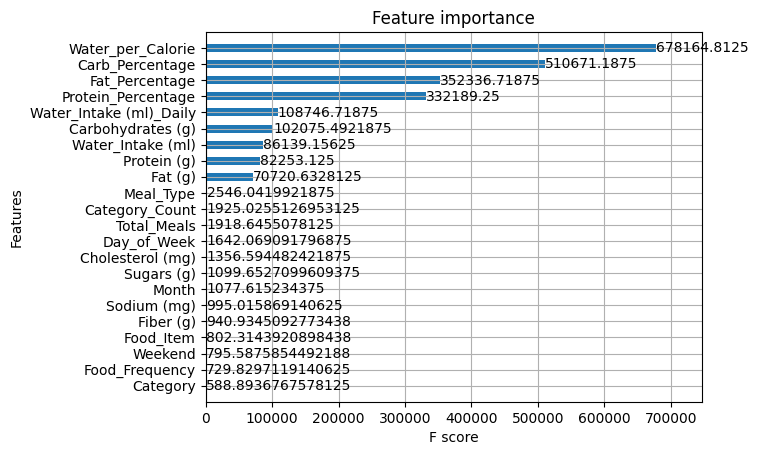

In [51]:
xgb.plot_importance(model, importance_type='gain', height=0.5)
plt.show()

Insight: feature importance highest is `Water_per_Calorie`

In [52]:
importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature     Importance
20        Water_per_Calorie  678164.812500
16          Carb_Percentage  510671.187500
17           Fat_Percentage  352336.718750
15       Protein_Percentage  332189.250000
21  Water_Intake (ml)_Daily  108746.718750
3         Carbohydrates (g)  102075.492188
10        Water_Intake (ml)   86139.156250
2               Protein (g)   82253.125000
4                   Fat (g)   70720.632812
9                 Meal_Type    2546.041992
19           Category_Count    1925.025513
14              Total_Meals    1918.645508
11              Day_of_Week    1642.069092
8          Cholesterol (mg)    1356.594482
6                Sugars (g)    1099.652710
13                    Month    1077.615234
7               Sodium (mg)     995.015869
5                 Fiber (g)     940.934509
0                 Food_Item     802.314392
12                  Weekend     795.587585
18           Food_Frequency     729.829712
1                  Category     588.893677


Insight: feature importance lowest is `Category`

In [53]:
y_pred = model.predict(x_val)
mape = mean_absolute_percentage_error(y_val, y_pred) * 100

mape_scores = []
mape_scores.append(mape)

print(f"Average MAPE: {np.mean(mape_scores):.2f}% ± {np.std(mape_scores):.2f}%")

Average MAPE: 3.71% ± 0.00%


## Hyperparameter Tuning

Hyperparameter tuning is a crucial step in optimizing machine learning models, as it helps improve accuracy and generalization. In XGBoost, several hyperparameters control how the model learns, such as learning rate, maximum depth, and the number of estimators. One of the most effective ways to find the best hyperparameters is by using GridSearchCV, a systematic search method that evaluates different hyperparameter combinations to find the optimal settings.

In [54]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',  # Use MAPE as the evaluation metric
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [55]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_absolute_percentage_error', verbose=2)

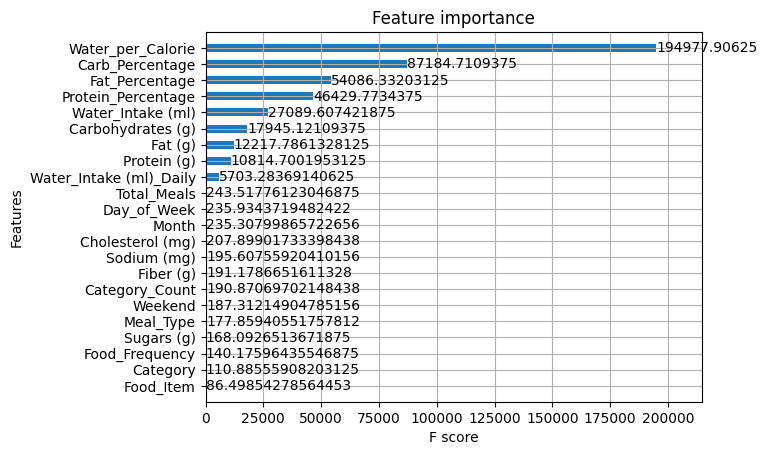

In [56]:
best_model = grid_search.best_estimator_

# Plot feature importance
xgb.plot_importance(best_model, importance_type='gain', height=0.5)
plt.show()

Insight: feature importance highest is `Water_per_Calorie`

In [57]:
importance = best_model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature     Importance
20        Water_per_Calorie  194977.906250
16          Carb_Percentage   87184.710938
17           Fat_Percentage   54086.332031
15       Protein_Percentage   46429.773438
10        Water_Intake (ml)   27089.607422
3         Carbohydrates (g)   17945.121094
4                   Fat (g)   12217.786133
2               Protein (g)   10814.700195
21  Water_Intake (ml)_Daily    5703.283691
14              Total_Meals     243.517761
11              Day_of_Week     235.934372
13                    Month     235.307999
8          Cholesterol (mg)     207.899017
7               Sodium (mg)     195.607559
5                 Fiber (g)     191.178665
19           Category_Count     190.870697
12                  Weekend     187.312149
9                 Meal_Type     177.859406
6                Sugars (g)     168.092651
18           Food_Frequency     140.175964
1                  Category     110.885559
0                 Food_Item      86.498543


Insight: feature importance lowest is `Food_Item`

In [58]:
y_pred_grid = grid_search.predict(x_val)
mape_grid = mean_absolute_percentage_error(y_val, y_pred_grid) * 100 

mape_scores = []
mape_scores.append(mape_grid)

print(f"Average MAPE: {np.mean(mape_scores):.2f}% ± {np.std(mape_scores):.2f}%")

Average MAPE: 2.09% ± 0.00%


## Conclusion

Feature importance highest in both model is `Water_per_Calorie`, and lowest is `Food_Item` and `Category`. Hyperparameter tuning can improve MAPE, so for model delpoyment use `best_model` from hyperparameetr tuning with MAPE 2.09%

## Refreence

1. https://www.kaggle.com/datasets/adilshamim8/daily-food-and-nutrition-dataset

2. https://www.analyticsvidhya.com/

3. https://xbe.at/

4. https://scikit-learn.org/stable/

5. https://chatgpt.com/

In [59]:
import joblib

# Simpan model terbaik setelah GridSearchCV
best_model = grid_search.best_estimator_
joblib.dump(best_model, "xgboost_best_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [62]:
# Load model yang sudah disimpan
best_model_loaded = joblib.load("xgboost_best_model.pkl")

# Contoh prediksi
y_pred = best_model_loaded.predict(x_val)
print(y_pred)

[ 65.133064 507.29752  396.57858  ... 521.2822   561.8845    60.165096]
